## Test PyAPS

Calculate tropospheric delay from ERA-5 dataset using pyaps3.

In [1]:
%matplotlib inline
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pyaps3 as pa

print('------------------------------------------------')
print('You are using PyAPS from %s'%pa.__file__)
print('------------------------------------------------')

------------------------------------------------
You are using PyAPS from /Users/yunjunz/development/python/PyAPS/pyaps3/__init__.py
------------------------------------------------


### Download data from ECMWF

In [2]:
print('Testing Download Methods')
print('Testing ECMWF Downloads')
pa.ECMWFdload(['20140526','20130426'],'12','./ECMWF', model='ERA5', snwe=(25,35,125,135))

print('------------------------------------------------')
print('Downloads OK')
print('------------------------------------------------')

2019-12-18 15:54:49,669 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


Testing Download Methods
Testing ECMWF Downloads
INFO: You are using the latest ECMWF platform for downloading datasets: https://cds.climate.copernicus.eu/api/v2
{'product_type': 'reanalysis', 'format': 'grib', 'variable': ['geopotential', 'temperature', 'specific_humidity'], 'pressure_level': ['1', '2', '3', '5', '7', '10', '20', '30', '50', '70', '100', '125', '150', '175', '200', '225', '250', '300', '350', '400', '450', '500', '550', '600', '650', '700', '750', '775', '800', '825', '850', '875', '900', '925', '950', '975', '1000'], 'year': '2014', 'month': '05', 'day': '26', 'time': '12:00', 'area': '35.00/125.00/25.00/135.00'}


2019-12-18 15:54:51,075 INFO Request is completed
2019-12-18 15:54:51,076 INFO Downloading http://136.156.132.110/cache-compute-0001/cache/data1/adaptor.mars.internal-1576342409.3018048-5081-19-9a76fde8-e0e0-4eba-9ab3-1f29cbedaf84.grib to ./ECMWF/ERA-5_20140526_12.grb (377.2K)
2019-12-18 15:54:54,757 INFO Download rate 102.5K/s
2019-12-18 15:54:57,134 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


{'product_type': 'reanalysis', 'format': 'grib', 'variable': ['geopotential', 'temperature', 'specific_humidity'], 'pressure_level': ['1', '2', '3', '5', '7', '10', '20', '30', '50', '70', '100', '125', '150', '175', '200', '225', '250', '300', '350', '400', '450', '500', '550', '600', '650', '700', '750', '775', '800', '825', '850', '875', '900', '925', '950', '975', '1000'], 'year': '2013', 'month': '04', 'day': '26', 'time': '12:00', 'area': '35.00/125.00/25.00/135.00'}


2019-12-18 15:54:58,754 INFO Request is completed
2019-12-18 15:54:58,755 INFO Downloading http://136.156.132.110/cache-compute-0001/cache/data1/adaptor.mars.internal-1576585889.2544336-21780-29-272f1f99-a576-4d41-8683-3a72fadbf8c1.grib to ./ECMWF/ERA-5_20130426_12.grb (377.2K)
2019-12-18 15:54:59,769 INFO Download rate 372.5K/s


------------------------------------------------
Downloads OK
------------------------------------------------


### Calculate tropospheric delay using PyAPS object

Testing ECMWF in Radar geometry with dem in DOUBLE format
With Lat Lon files (ISCE)
INFO: INCIDENCE ANGLE AS AN ARRAY
INFO: AREA COVERAGE IN SNWE: (33.85, 30.05, 129.05, 132.45)
PROGRESS: READING GRIB FILE
INFO: USING PRESSURE LEVELS OF ERA-INT OR ERA-5 DATA
INFO: IMAGE DIMENSIONS: 15 LATITUDES AND 13 LONGITUDES
PROGRESS: INTERPOLATING FROM PRESSURE TO HEIGHT LEVELS
PROGRESS: COMPUTING DELAY FUNCTIONS
INFO: INCIDENCE ANGLE AS AN ARRAY
INFO: AREA COVERAGE IN SNWE: (33.85, 30.05, 129.05, 132.45)
PROGRESS: READING GRIB FILE
INFO: USING PRESSURE LEVELS OF ERA-INT OR ERA-5 DATA
INFO: IMAGE DIMENSIONS: 15 LATITUDES AND 13 LONGITUDES
PROGRESS: INTERPOLATING FROM PRESSURE TO HEIGHT LEVELS
PROGRESS: COMPUTING DELAY FUNCTIONS
PROGRESS: FINE INTERPOLATION OF HEIGHT LEVELS
PROGRESS: CREATE THE BILINEAR INTERPOLATION FUNCTION
PROGRESS: MAPPING THE DELAY
[============================================================]      0s /      0s 
PROGRESS: FINE INTERPOLATION OF HEIGHT LEVELS
PROGRESS: CREATE TH

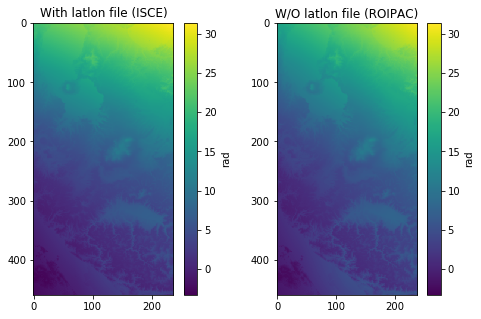

In [3]:
date1, date2 = '20130426', '20140526'
print('Testing ECMWF in Radar geometry with dem in DOUBLE format')

# read geometry files
dem = pa.utils.read_data('hgt.rdr')
inc = pa.utils.read_data('los.rdr', dname='inc')

print('With Lat Lon files (ISCE)')
lat = pa.utils.read_data('lat.rdr')
lon = pa.utils.read_data('lon.rdr')
aps1 = pa.PyAPS('ECMWF/ERA-5_{}_12.grb'.format(date1), dem=dem, inc=inc, lat=lat, lon=lon, grib='ERA5', verb=True)
aps2 = pa.PyAPS('ECMWF/ERA-5_{}_12.grb'.format(date2), dem=dem, inc=inc, lat=lat, lon=lon, grib='ERA5', verb=True)

phs1 = np.zeros((aps1.ny,aps1.nx))
phs2 = np.zeros((aps2.ny,aps2.nx))

aps1.getdelay(phs1, wvl=0.056)
aps2.getdelay(phs2, wvl=0.056)
LLphs = phs2-phs1

print('W/O Lat Lon files (ROIPAC)')
lat2, lon2 = pa.utils.get_lat_lon('hgt.rdr.rsc')
aps1 = pa.PyAPS('ECMWF/ERA-5_{}_12.grb'.format(date1), dem=dem, inc=inc, lat=lat2, lon=lon2, grib='ERA5', verb=True)
aps2 = pa.PyAPS('ECMWF/ERA-5_{}_12.grb'.format(date2), dem=dem, inc=inc, lat=lat2, lon=lon2, grib='ERA5', verb=True)

phs1 = np.zeros((aps1.ny,aps1.nx))
phs2 = np.zeros((aps2.ny,aps2.nx))

aps1.getdelay(phs1, wvl=0.056)
aps2.getdelay(phs2, wvl=0.056)
phs = phs2-phs1

# plot
disp_min = min([np.nanmin(LLphs), np.nanmin(phs)])
disp_max = min([np.nanmax(LLphs), np.nanmax(phs)])
fig, [ax1,ax2] = plt.subplots(num='ECMWF/ERA-5 for {}_{}'.format(date1, date2), nrows=1, ncols=2, figsize=[8, 5])
im1 = ax1.imshow(LLphs, vmin=disp_min, vmax=disp_max)
im2 = ax2.imshow(phs, vmin=disp_min, vmax=disp_max)
ax1.set_title('With latlon file (ISCE)')
ax2.set_title('W/O latlon file (ROIPAC)')
cbar1 = fig.colorbar(im1, ax=ax1)
cbar2 = fig.colorbar(im2, ax=ax2)
cbar1.set_label('rad')
cbar2.set_label('rad')

print('------------------------------------------------')
print('ECMWF OK')
print('------------------------------------------------')
plt.show()

### Example to use PyAPS with MintPy files

Testing ECMWF/ERA-5 with MintPy geometry file
INFO: INCIDENCE ANGLE AS AN ARRAY
INFO: AREA COVERAGE IN SNWE: (33.86, 30.05, 129.04, 132.46)
PROGRESS: READING GRIB FILE
INFO: USING PRESSURE LEVELS OF ERA-INT OR ERA-5 DATA
INFO: IMAGE DIMENSIONS: 15 LATITUDES AND 13 LONGITUDES
PROGRESS: INTERPOLATING FROM PRESSURE TO HEIGHT LEVELS
PROGRESS: COMPUTING DELAY FUNCTIONS
INFO: INCIDENCE ANGLE AS AN ARRAY
INFO: AREA COVERAGE IN SNWE: (33.86, 30.05, 129.04, 132.46)
PROGRESS: READING GRIB FILE
INFO: USING PRESSURE LEVELS OF ERA-INT OR ERA-5 DATA
INFO: IMAGE DIMENSIONS: 15 LATITUDES AND 13 LONGITUDES
PROGRESS: INTERPOLATING FROM PRESSURE TO HEIGHT LEVELS
PROGRESS: COMPUTING DELAY FUNCTIONS
PROGRESS: FINE INTERPOLATION OF HEIGHT LEVELS
PROGRESS: CREATE THE BILINEAR INTERPOLATION FUNCTION
PROGRESS: MAPPING THE DELAY
[============================================================]      5s /      0s 
PROGRESS: FINE INTERPOLATION OF HEIGHT LEVELS
PROGRESS: CREATE THE BILINEAR INTERPOLATION FUNCTION
PROG

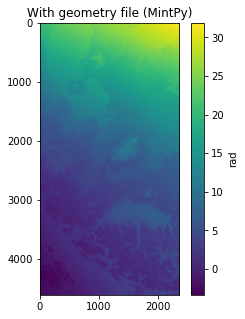

In [4]:
from mintpy.utils import readfile
date1, date2 = '20130426', '20140526'
print('Testing ECMWF/ERA-5 with MintPy geometry file')

# read geometry files
dem_file = os.path.expanduser('~/data/Kirishima/AlosAT424F620_630/mintpy/inputs/geometryRadar.h5')
dem = readfile.read(dem_file, datasetName='height')[0]
inc = readfile.read(dem_file, datasetName='incidenceAngle')[0]
lat = readfile.read(dem_file, datasetName='latitude')[0]
lon = readfile.read(dem_file, datasetName='longitude')[0]

aps1 = pa.PyAPS('ECMWF/ERA-5_{}_12.grb'.format(date1), dem=dem, inc=inc, lat=lat, lon=lon, grib='ERA5', verb=True)
aps2 = pa.PyAPS('ECMWF/ERA-5_{}_12.grb'.format(date2), dem=dem, inc=inc, lat=lat, lon=lon, grib='ERA5', verb=True)

phs1 = np.zeros((aps1.ny,aps1.nx))
phs2 = np.zeros((aps2.ny,aps2.nx))

aps1.getdelay(phs1, wvl=0.056)
aps2.getdelay(phs2, wvl=0.056)
LLphs = phs2-phs1

# plot
fig, ax = plt.subplots(num='ECMWF/ERA-5 for {}_{}'.format(date1, date2), nrows=1, ncols=1, figsize=[4, 5])
im = ax.imshow(LLphs)
ax.set_title('With geometry file (MintPy)')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('rad')

print('------------------------------------------------')
print('ECMWF OK')
print('------------------------------------------------')
plt.show()